## Part 2: Analytical Acumen

**Prompt: Analyze draft position value and team success/deficiencies compared to expectation.**

    a. Create a method for valuing each draft slot in the NBA Draft (picks 1 through 60 in most drafts).

    b. Conditional on the expected value of the draft positions, 

**Which NBA teams have over or underperformed the most when drafting during this time span?** 

**Which College Teams have had the players outperform expectations the most after entering the NBA?**


# Imports
**Import pandas, seaborn, matplotlib**

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

**Get the Data** 

Working with the NBA Players Draft csv file. Containing player information such as name, college and draft team. There are also numerical columns:

   * Overall_pick
   * years_active
   * games
   * minutes_played
   * points:
   * total_rebounds
   * assist
   * etc...
   
**Read in NBA Players Draft csv file as a DataFrame called draft**


In [33]:
draft = pd.read_csv("nbaplayersdraft.csv")

**Check the head of draft, and check out its info() and describe() methods.**

In [35]:
draft.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [40]:
draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1922 non-null   int64  
 1   year                       1922 non-null   int64  
 2   rank                       1922 non-null   int64  
 3   overall_pick               1922 non-null   int64  
 4   team                       1922 non-null   object 
 5   player                     1922 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1669 non-null   float64
 8   games                      1669 non-null   float64
 9   minutes_played             1669 non-null   float64
 10  points                     1669 non-null   float64
 11  total_rebounds             1669 non-null   float64
 12  assists                    1669 non-null   float64
 13  field_goal_percentage      1665 non-null   float

In [41]:
draft.describe()

,id,year,rank,overall_pick,years_active,games,minutes_played,points,total_rebounds,assists,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
count,1922.000000,1922.000000,1922.000000,1922.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,...,1545.000000,1633.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1668.000000,1668.000000,1669.000000
mean,961.500000,2005.317378,29.694589,29.694589,6.332534,348.042540,8399.055722,3580.413421,1497.009587,774.300779,...,0.272405,0.716825,18.134032,7.275734,3.194368,1.550749,17.873697,0.061691,-2.311271,4.403176
std,554.977927,9.456946,16.912454,16.912454,4.656321,324.897567,9845.871529,4826.142847,2003.686388,1284.602969,...,0.128339,0.118702,8.707656,4.969343,2.083895,1.488536,27.989805,0.094467,4.143403,11.461729
min,1.000000,1989.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-1.264000,-52.000000,-8.500000
25%,481.250000,1997.000000,15.000000,15.000000,2.000000,72.000000,838.000000,265.000000,128.000000,46.000000,...,0.222000,0.659000,11.000000,3.400000,1.700000,0.500000,0.400000,0.030000,-3.900000,-0.400000
50%,961.500000,2005.000000,30.000000,30.000000,5.000000,235.000000,4204.000000,1552.000000,656.000000,257.000000,...,0.317000,0.736000,17.700000,6.200000,2.800000,1.100000,5.300000,0.069000,-2.000000,0.000000
75%,1441.750000,2013.000000,44.000000,44.000000,10.000000,584.000000,13246.000000,5150.000000,2139.000000,910.000000,...,0.356000,0.797000,24.800000,10.000000,4.200000,2.100000,24.500000,0.104000,-0.300000,4.500000
max,1922.000000,2021.000000,60.000000,60.000000,22.000000,1541.000000,52139.000000,37062.000000,15091.000000,12091.000000,...,1.000000,1.000000,41.100000,27.200000,13.300000,9.500000,249.500000,1.442000,51.100000,142.600000


In [42]:
#Convert Team, Player and College to string type

players = players.astype({'player':'string', 'team':'string', 'college':'string'})
print(players.dtypes)

id                             int64
year                           int64
rank                           int64
overall_pick                   int64
team                          string
player                        string
college                       string
years_active                 float64
games                        float64
minutes_played               float64
points                       float64
total_rebounds               float64
assists                      float64
field_goal_percentage        float64
3_point_percentage           float64
free_throw_percentage        float64
average_minutes_played       float64
points_per_game              float64
average_total_rebounds       float64
average_assists              float64
win_shares                   float64
win_shares_per_48_minutes    float64
box_plus_minus               float64
value_over_replacement       float64
dtype: object


In [55]:
#Colleges who have players outperform expectations the most after entering the NBA.

df1=draft.groupby(['college']).sum().sort_values(by=['value_over_replacement'],ascending=False)
df2=df1[['minutes_played','win_shares', 'value_over_replacement', 'box_plus_minus']]

df2.head(10)


/var/folders/vr/vzrh0wms6jq_j43dpf8nlk6h0000gn/T/ipykernel_18899/3356935066.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1=draft.groupby(['college']).sum().sort_values(by=['value_over_replacement'],ascending=False)


,minutes_played,win_shares,value_over_replacement,box_plus_minus
college,,,,
Kentucky,538292.0,1089.0,305.7,-51.6
Duke,535270.0,1177.6,297.0,-80.3
UNC,504352.0,1044.2,243.4,-54.7
UCLA,397511.0,797.9,242.9,-53.2
Wake Forest,199844.0,634.4,241.2,4.6
UConn,366593.0,796.0,226.8,-34.6
Arizona,419753.0,862.5,218.0,-102.7
Georgia Tech,280831.0,624.5,150.8,-63.4
Florida,222518.0,530.6,148.2,-22.4


**Exploring the types of relationships across the entire data set**

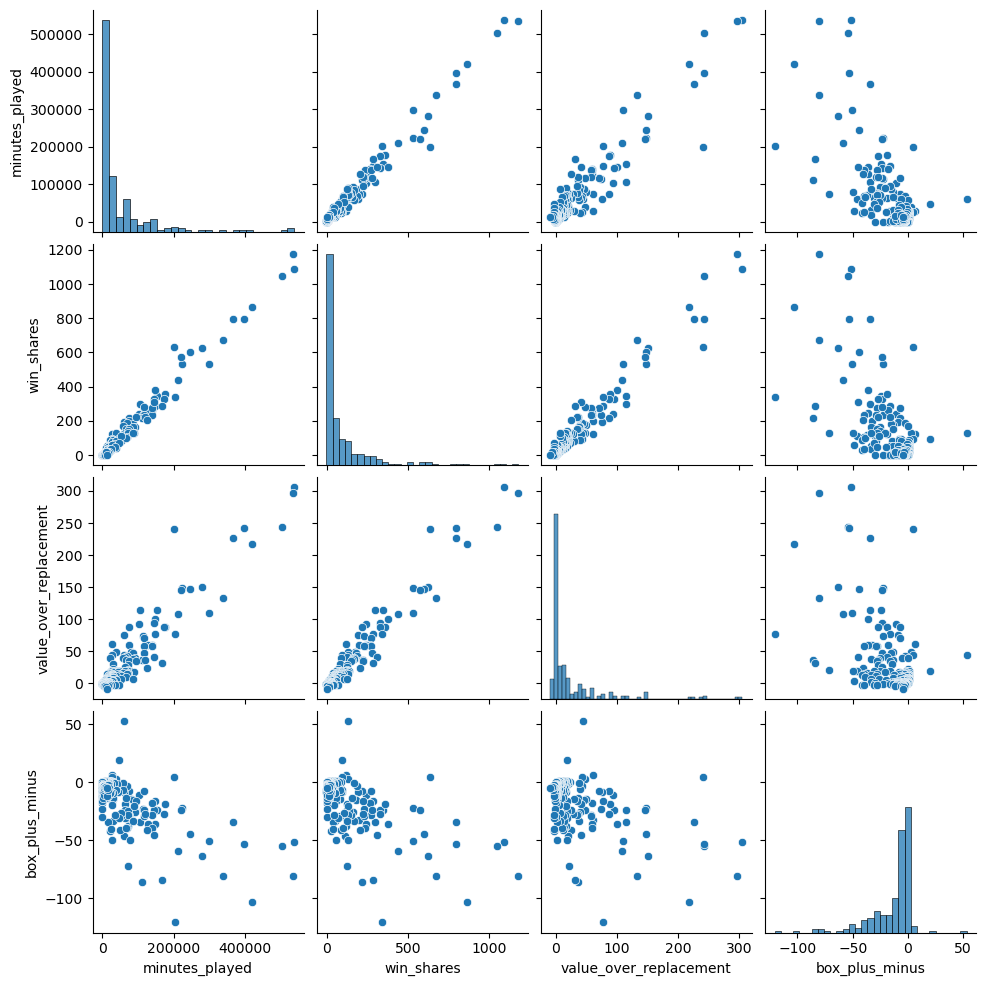

In [50]:
sns.pairplot(df2)

**Based off this plot, win_shares and value_over_replacement looks to be the most correlated feature with Minutes Played**

In [63]:
#Colleges who have underperformed

df3=draft.groupby(['college']).sum().sort_values(by=['value_over_replacement'])
df4=df3[['minutes_played','win_shares', 'value_over_replacement', 'box_plus_minus']]

df4.head(10)

/var/folders/vr/vzrh0wms6jq_j43dpf8nlk6h0000gn/T/ipykernel_18899/724745337.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3=draft.groupby(['college']).sum().sort_values(by=['value_over_replacement'])


,minutes_played,win_shares,value_over_replacement,box_plus_minus
college,,,,
University of the Pacific,13129.0,2.5,-8.5,-4.6
Wright State University,11608.0,15.5,-5.9,-4.0
Cleveland State University,8018.0,3.0,-4.1,-4.1
Austin Peay State University,16673.0,13.9,-3.9,-6.4
Florida A&M,4771.0,2.9,-3.5,-4.9
Houston,14303.0,17.6,-3.4,-12.2
Detroit Mercy,17591.0,15.0,-3.1,-5.3
Texas Tech,24849.0,37.4,-2.6,-40.2
Baylor,36642.0,46.2,-2.6,-28.2


In [43]:
#NBA teams that have overperformed the most when drafting during this time span?

df5=draft.groupby(['team']).sum().sort_values(by=['value_over_replacement'],ascending=False)
df6=df5[['minutes_played','win_shares', 'value_over_replacement', 'box_plus_minus']]

df6.head(10)

/var/folders/vr/vzrh0wms6jq_j43dpf8nlk6h0000gn/T/ipykernel_18899/4237962904.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df5=draft.groupby(['team']).sum().sort_values(by=['value_over_replacement'],ascending=False)


,minutes_played,win_shares,value_over_replacement,box_plus_minus
team,,,,
CLE,543158.0,1244.0,366.6,-104.7
GSW,563987.0,1285.4,353.1,-167.4
SEA,508284.0,1217.3,344.3,-68.9
MIN,586328.0,1199.8,324.3,-117.1
PHI,574724.0,1170.1,310.1,-188.1
MIL,570320.0,1200.8,297.8,-136.7
ORL,463557.0,1097.7,284.7,-122.7
DEN,506561.0,1132.4,281.0,-80.8
BOS,548382.0,1087.1,274.7,-174.4


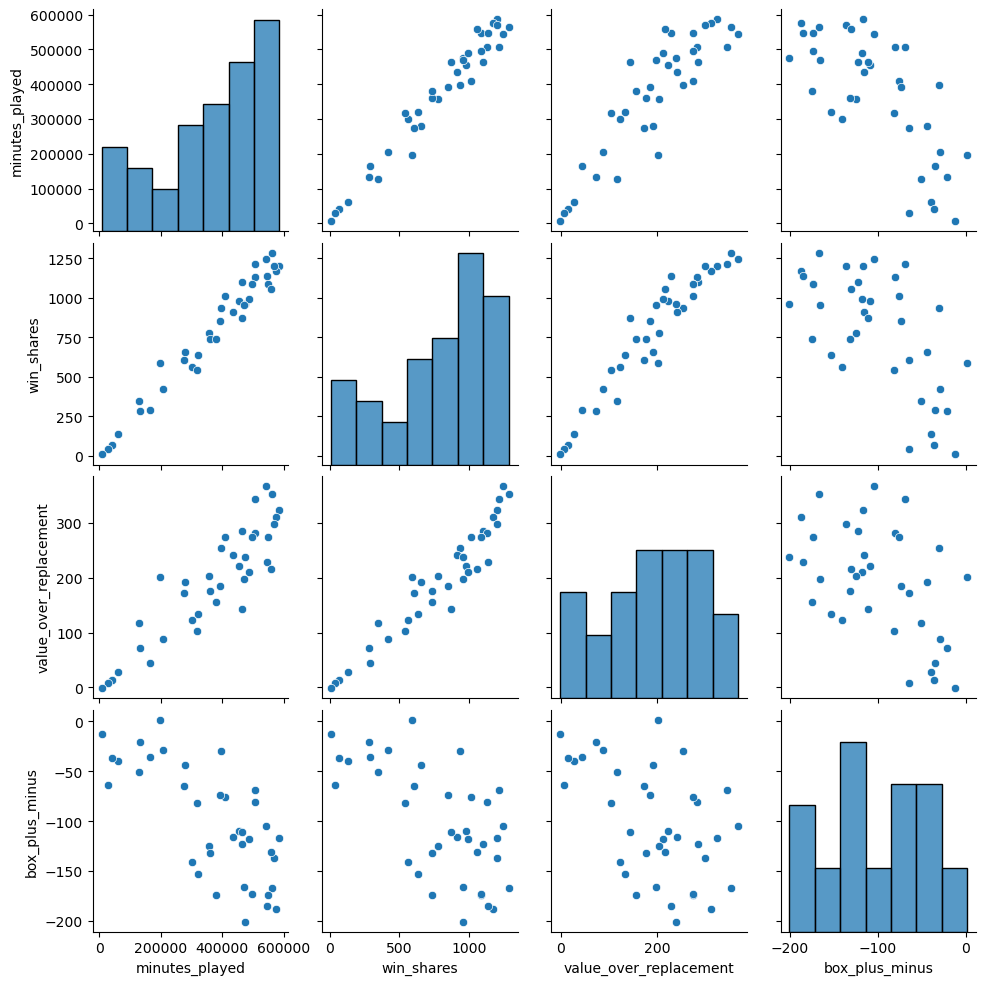

In [51]:
sns.pairplot(df6)

**Based off this plot, win_shares and value_over_replacement looks to be the most correlated feature with Minutes Played**

In [44]:
#NBA teams that have underperformed the most when drafting during this time span 

df7=draft.groupby(['team']).sum().sort_values(by=['value_over_replacement'])
df8=df7[['minutes_played','win_shares', 'value_over_replacement', 'box_plus_minus']]

df8.head(10)

/var/folders/vr/vzrh0wms6jq_j43dpf8nlk6h0000gn/T/ipykernel_18899/543047505.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df7=draft.groupby(['team']).sum().sort_values(by=['value_over_replacement'])


,minutes_played,win_shares,value_over_replacement,box_plus_minus
team,,,,
NOK,7304.0,8.1,-1.1,-12.6
NOP,29571.0,40.1,7.1,-64.2
CHO,42024.0,67.2,14.3,-36.7
BRK,61197.0,134.6,27.2,-39.4
WSB,163946.0,291.7,44.1,-35.6
VAN,134087.0,282.9,72.2,-21.0
CHA,206517.0,420.5,88.0,-28.9
WAS,317106.0,543.4,103.4,-82.2
OKC,129038.0,349.2,116.8,-50.5


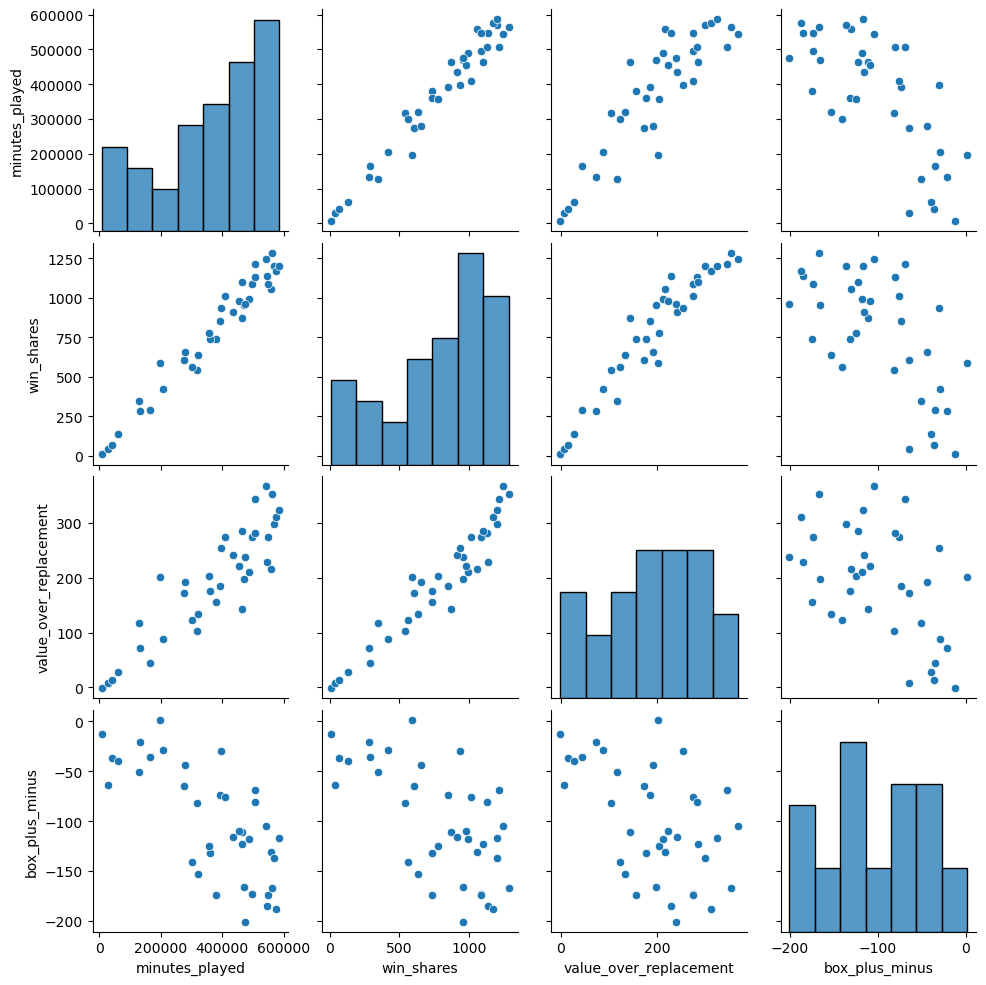

In [53]:
sns.pairplot(df8)

**Resources:**

- https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5784222?start=15#overview
- https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
- https://docs.python.org/3/library/re.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html